In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, precision_score,precision_recall_fscore_support, roc_auc_score, log_loss, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [4]:
data = pd.read_csv("dataset.csv")
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [5]:
data.shape

(4424, 37)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [7]:
pd.set_option('display.max_columns', None)
data.describe().round(3)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000
mean,1.179,18.669,1.728,8856.643,0.891,4.578,132.613,1.873,19.562,22.275,10.961,11.032,126.978,0.548,0.012,0.114,0.881,0.352,0.248,23.265,0.025,0.710,6.271,8.299,4.707,10.641,0.138,0.542,6.232,8.063,4.436,10.230,0.150,11.566,1.228,0.002
std,0.606,17.485,1.314,2063.566,0.312,10.217,13.188,6.915,15.603,15.343,26.418,25.263,14.482,0.498,0.107,0.317,0.324,0.478,0.432,7.588,0.156,2.361,2.480,4.179,3.094,4.844,0.691,1.919,2.196,3.948,3.015,5.211,0.754,2.664,1.383,2.270
min,1.000,1.000,0.000,33.000,0.000,1.000,95.000,1.000,1.000,1.000,0.000,0.000,95.000,0.000,0.000,0.000,0.000,0.000,0.000,17.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,7.600,-0.800,-4.060
25%,1.000,1.000,1.000,9085.000,1.000,1.000,125.000,1.000,2.000,3.000,4.000,4.000,117.900,0.000,0.000,0.000,1.000,0.000,0.000,19.000,0.000,0.000,5.000,6.000,3.000,11.000,0.000,0.000,5.000,6.000,2.000,10.750,0.000,9.400,0.300,-1.700
50%,1.000,17.000,1.000,9238.000,1.000,1.000,133.100,1.000,19.000,19.000,5.000,7.000,126.100,1.000,0.000,0.000,1.000,0.000,0.000,20.000,0.000,0.000,6.000,8.000,5.000,12.286,0.000,0.000,6.000,8.000,5.000,12.200,0.000,11.100,1.400,0.320
75%,1.000,39.000,2.000,9556.000,1.000,1.000,140.000,1.000,37.000,37.000,9.000,9.000,134.800,1.000,0.000,0.000,1.000,1.000,0.000,25.000,0.000,0.000,7.000,10.000,6.000,13.400,0.000,0.000,7.000,10.000,6.000,13.333,0.000,13.900,2.600,1.790
max,6.000,57.000,9.000,9991.000,1.000,43.000,190.000,109.000,44.000,44.000,194.000,195.000,190.000,1.000,1.000,1.000,1.000,1.000,1.000,70.000,1.000,20.000,26.000,45.000,26.000,18.875,12.000,19.000,23.000,33.000,20.000,18.571,12.000,16.200,3.700,3.510


In [8]:
# check total null values
data.isnull().sum()

,0
Marital status,0
Application mode,0
Application order,0
Course,0
Daytime/evening attendance,0
Previous qualification,0
Previous qualification (grade),0
Nacionality,0
Mother's qualification,0
Father's qualification,0


In [9]:
data.duplicated().sum()

np.int64(0)

In [10]:
data_filtered = data[data['Target'] != 'Enrolled']
data_filtered.shape

(3630, 37)

In [11]:
data_no_outliers = data_filtered.copy()
data_no_outliers['Target'] = data_no_outliers['Target'].map({
    'Dropout': 0,
    'Graduate': 1
})

In [12]:
data_no_outliers.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1


In [13]:
data_no_outliers.shape

(3630, 37)

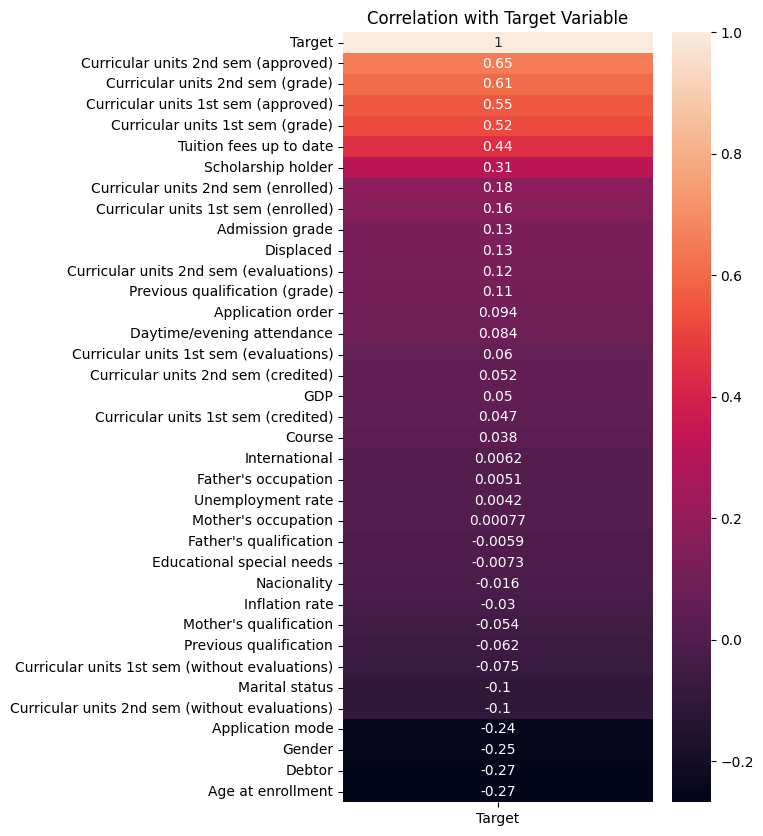

In [14]:
data_2 = data_no_outliers.copy()

data_2.replace("Dropout",0,inplace=True)
data_2.replace("Enrolled",1,inplace=True)
data_2.replace("Graduate",2,inplace=True)


plt.figure(figsize = (5,10))
sns.heatmap(data_2.corr()[['Target']].sort_values(by='Target', ascending=False), annot = True)
plt.title('Correlation with Target Variable')
plt.show()

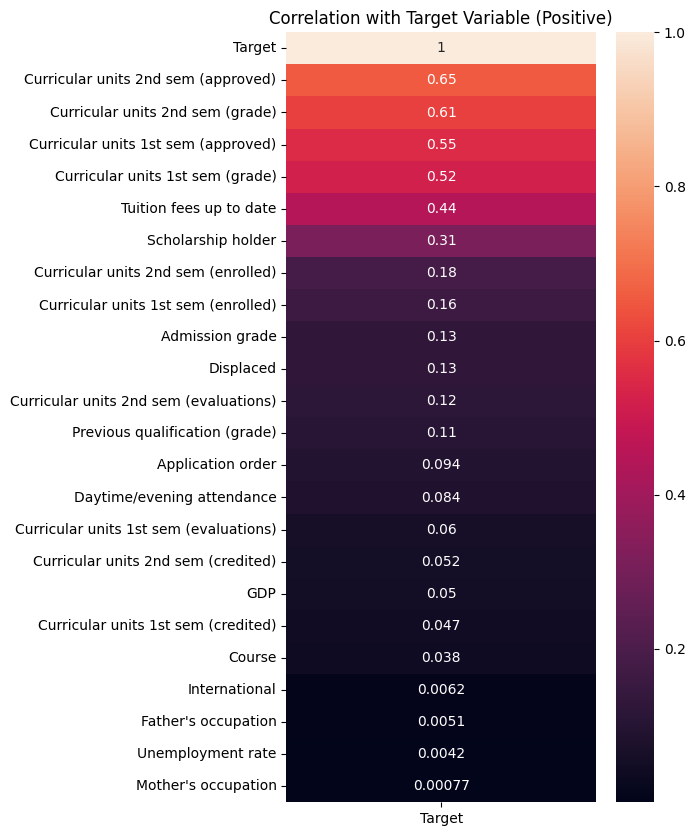

In [15]:
correlation_matrix = data_2.corr()
positive_correlation_features = correlation_matrix['Target'][correlation_matrix['Target'] > 0].index
data_no_outliers = data_2[positive_correlation_features]
plt.figure(figsize=(5, 10))
sns.heatmap(data_no_outliers.corr()[['Target']].sort_values(by='Target', ascending=False), annot=True)
plt.title('Correlation with Target Variable (Positive)')
plt.show()

In [16]:
data_no_outliers.shape

(3630, 24)

/tmp/ipython-input-3255661616.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Target', y=col, data=data_no_outliers, palette='viridis')
/tmp/ipython-input-3255661616.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Target', y=col, data=data_no_outliers, palette='viridis')
/tmp/ipython-input-3255661616.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Target', y=col, data=data_no_outliers, palette='viridis')
/tmp/ipython-input-3255661616.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will 

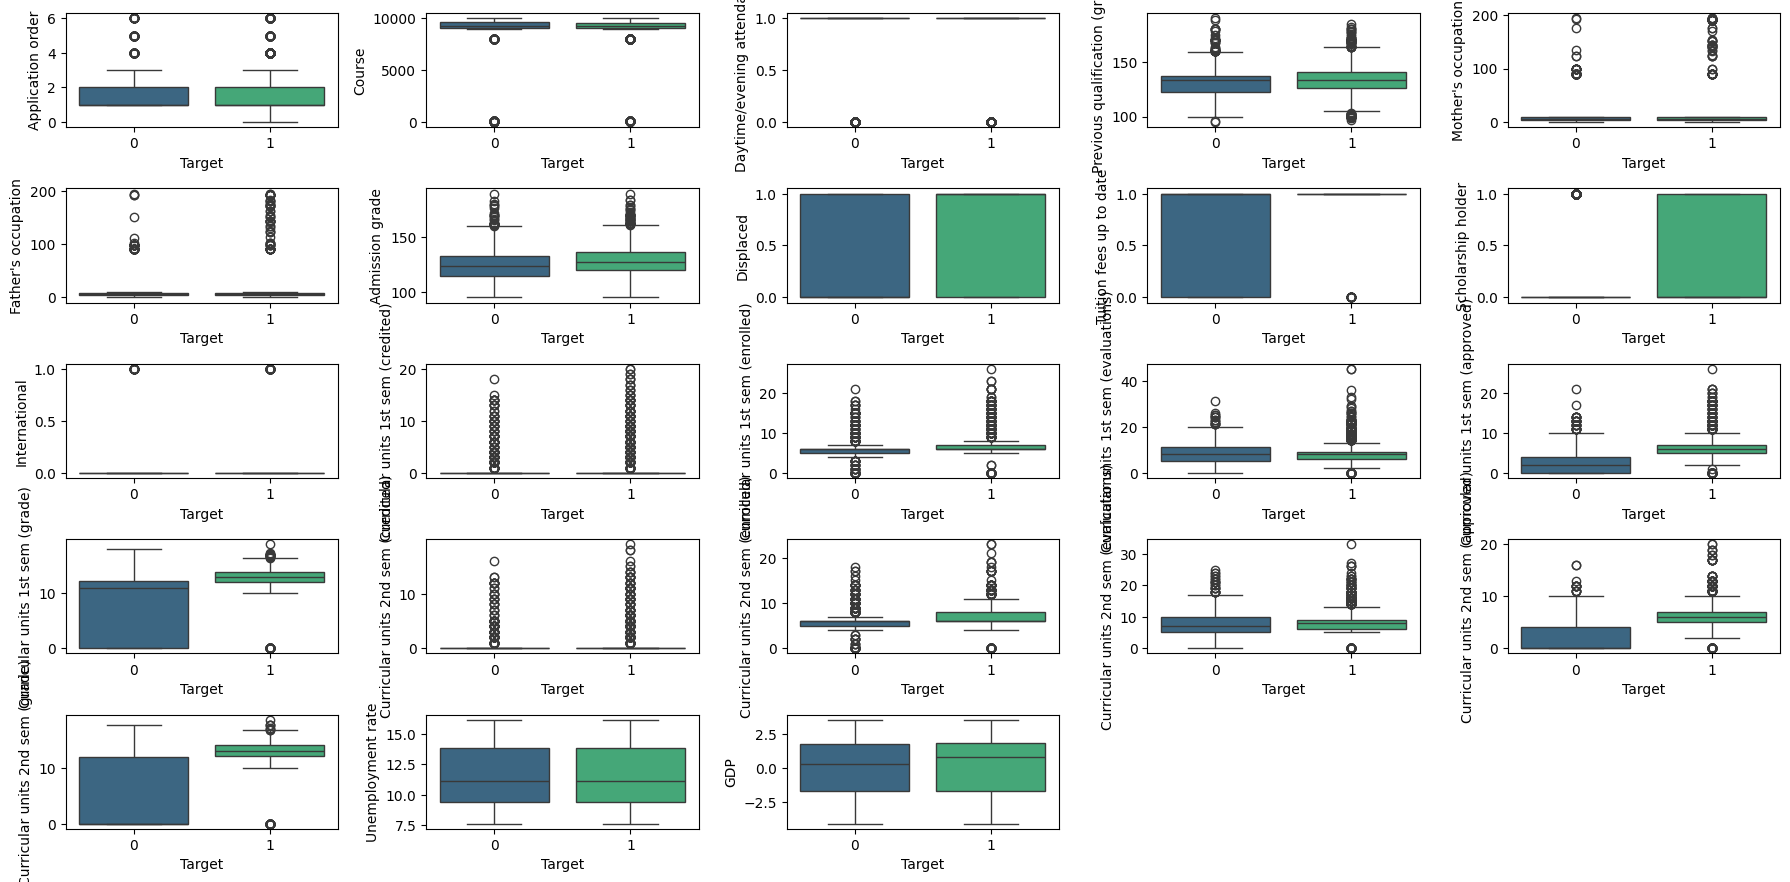

In [17]:
plt.figure(figsize=(18, 12))
gs = GridSpec(7, 5)
for i, col in enumerate(data_no_outliers.columns[:-1]):
    ax = plt.subplot(gs[i])
    sns.boxplot(x='Target', y=col, data=data_no_outliers, palette='viridis')
    ax.set_xlabel('Target', fontsize=10)
    ax.set_ylabel(col, fontsize=10)

plt.tight_layout()
plt.show()

/tmp/ipython-input-715555901.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Target', y=col, data=data_no_outliers, palette='viridis')
/tmp/ipython-input-715555901.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Target', y=col, data=data_no_outliers, palette='viridis')
/tmp/ipython-input-715555901.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Target', y=col, data=data_no_outliers, palette='viridis')
/tmp/ipython-input-715555901.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will 

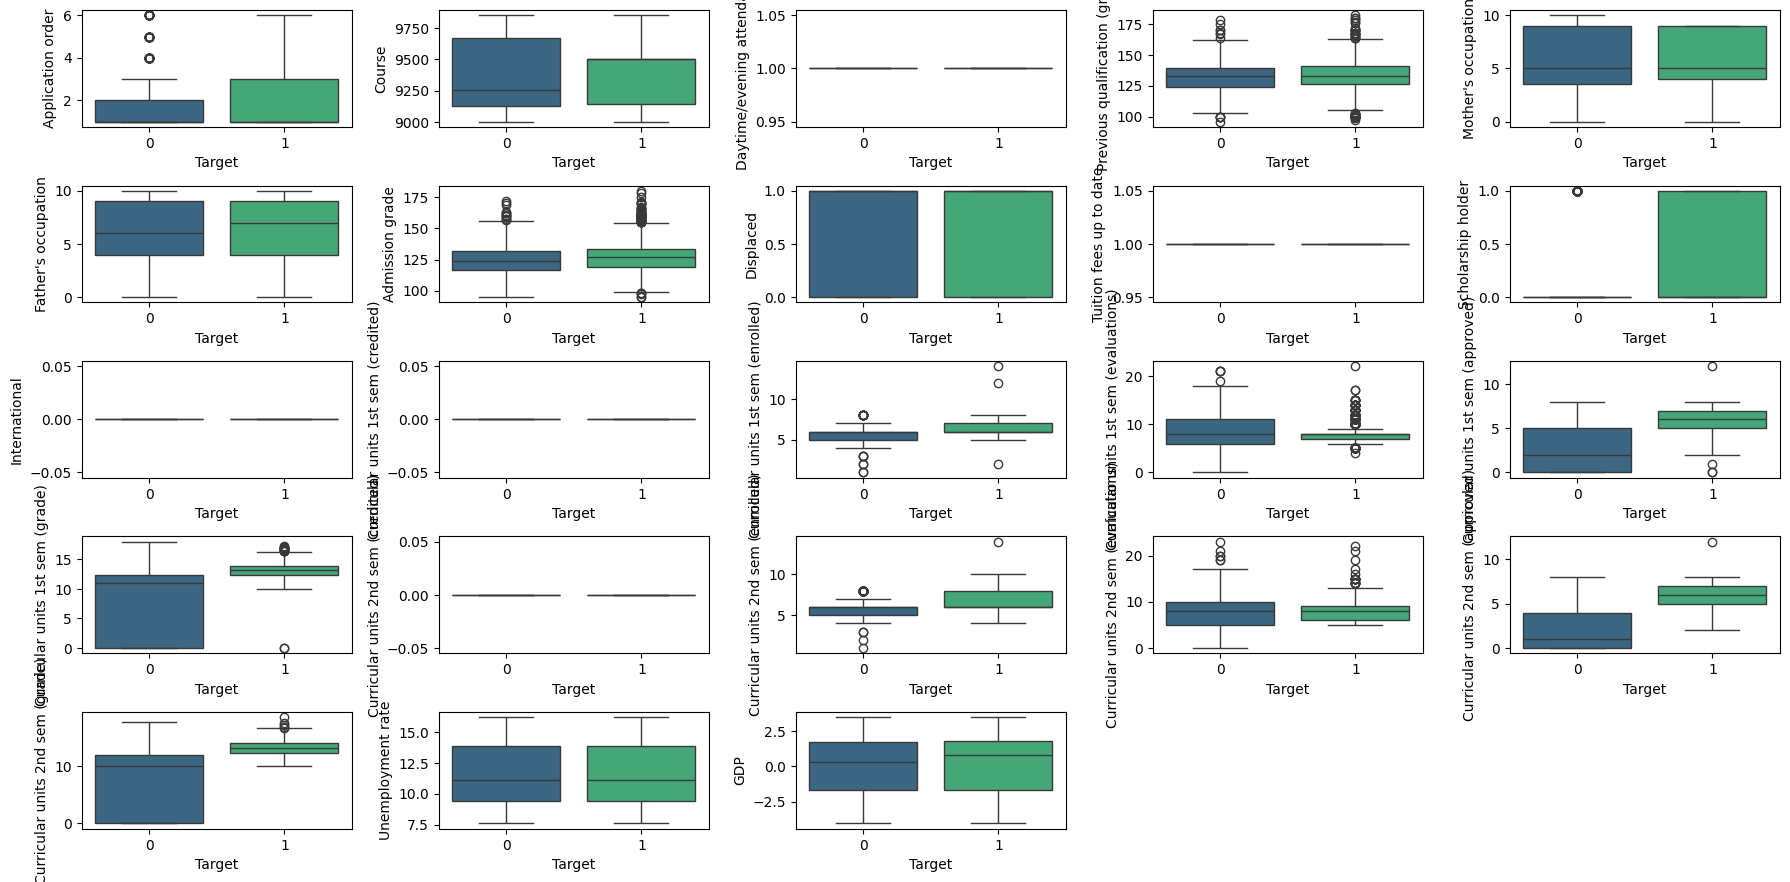

In [18]:
def remove_outliers_iqr(df, column, k):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - k * IQR
    upper_bound = Q3 + k * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

for col in data_no_outliers.columns[:-1]:
    data_no_outliers = remove_outliers_iqr(data_no_outliers, col, 10)

plt.figure(figsize=(18, 12))
gs = GridSpec(7, 5)

for i, col in enumerate(data_no_outliers.columns[:-1]):
    ax = plt.subplot(gs[i])
    sns.boxplot(x='Target', y=col, data=data_no_outliers, palette='viridis')
    ax.set_xlabel('Target', fontsize=10)
    ax.set_ylabel(col, fontsize=10)

plt.tight_layout()
plt.show()

In [19]:
data.shape

(4424, 37)

In [20]:
data_no_outliers.shape

(2226, 24)

In [21]:
X = data_no_outliers.drop('Target', axis=1)
y = data_no_outliers['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Names=list(X_train.columns.values)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
for i, col in enumerate(X.columns):
    print(f"{i}: {col}")

0: Application order
1: Course
2: Daytime/evening attendance
3: Previous qualification (grade)
4: Mother's occupation
5: Father's occupation
6: Admission grade
7: Displaced
8: Tuition fees up to date
9: Scholarship holder
10: International
11: Curricular units 1st sem (credited)
12: Curricular units 1st sem (enrolled)
13: Curricular units 1st sem (evaluations)
14: Curricular units 1st sem (approved)
15: Curricular units 1st sem (grade)
16: Curricular units 2nd sem (credited)
17: Curricular units 2nd sem (enrolled)
18: Curricular units 2nd sem (evaluations)
19: Curricular units 2nd sem (approved)
20: Curricular units 2nd sem (grade)
21: Unemployment rate
22: GDP


In [22]:
print("X_train : ",X_train.shape)
print("X_test : ",X_test.shape)
print("y_train : ",y_train.shape)
print("y_test : ",y_test.shape)

X_train :  (1491, 23)
X_test :  (735, 23)
y_train :  (1491,)
y_test :  (735,)


In [23]:
print("\nCounts of targets in y_train:")
print("Target 0:", sum(y_train == 0))
print("Target 1:", sum(y_train == 1))


Counts of targets in y_train:
Target 0: 435
Target 1: 1056


In [24]:
lg_model = LogisticRegression()
lg_model.fit(X_train, y_train)
y_pred_logreg = lg_model.predict(X_test)
accuracy_log= accuracy_score(y_test, y_pred_logreg)
print(f"Accuracy of Logistic Regression: {accuracy_log:.4f}")

Accuracy of Logistic Regression: 0.9143


In [25]:
dt = DecisionTreeClassifier()
param_grid = {
    'max_depth': [5, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10]
}
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
accuracy_dt = grid_search.best_score_
print(f"Accuracy of Decision Tree: {accuracy_dt:.4f}")

Accuracy of Decision Tree: 0.9135


In [26]:
rf = RandomForestClassifier()
param_grid = {'n_estimators': [50, 100, 150, 200], 'max_depth': [5, 10, 20, 30]}
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

best_rf = RandomForestClassifier(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'])
best_rf.fit(X_train, y_train)

Best Parameters: {'max_depth': 20, 'n_estimators': 150}


RandomForestClassifier(max_depth=20, n_estimators=150)

In [27]:
y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

Accuracy: 0.91
Precision: 0.91
Recall: 0.91
F1-score: 0.91


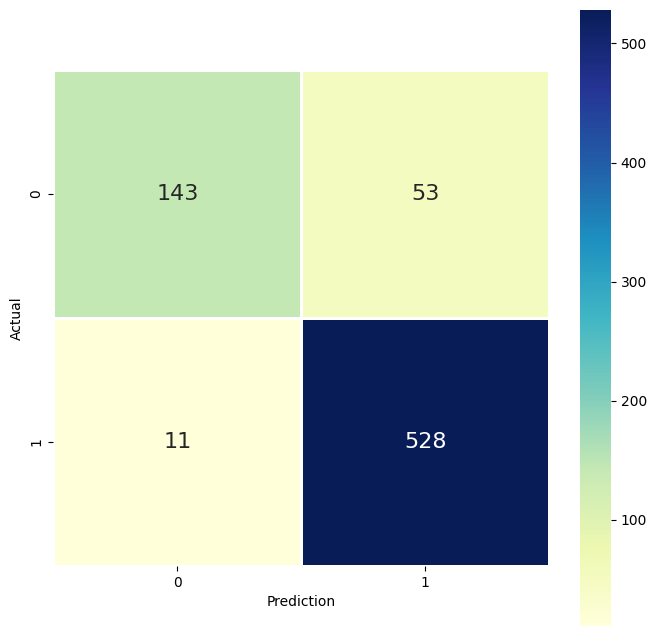

In [28]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cm, fmt=".0f", cmap="YlGnBu", linewidth=1, square=True, annot=True, annot_kws={"fontsize": 16}, ax=ax)

ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")
plt.show()

In [29]:
y_pred = best_rf.predict(X_test)
if y_pred[0] == 0:
    print("Student will Dropout")
else:
    print("Student will Graduate")

Student will Graduate


In [30]:
import joblib

# Save the model
filename = 'random_forest_model.pkl'
joblib.dump(best_rf, filename)

print(f"Model saved as {filename}")

# Instructions to download the file
print(f"\nTo download the model file '{filename}', you can use the file browser on the left sidebar in Colab.")
print("Alternatively, you can run the following code in a new cell:")
print(f"from google.colab import files")
print(f"files.download('{filename}')")

Model saved as random_forest_model.pkl

To download the model file 'random_forest_model.pkl', you can use the file browser on the left sidebar in Colab.
Alternatively, you can run the following code in a new cell:
from google.colab import files
files.download('random_forest_model.pkl')


In [31]:
from google.colab import files
files.download('random_forest_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>